In [84]:
# 多分类问题 https://www.kaggle.com/c/otto-group-product-classification-challenge/data?select=train.csv
import pandas as pd
import numpy as np
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import math

In [85]:
dataset = pd.read_csv("./otto-group-product-classification-challenge/train.csv")

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [87]:
dataset.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [88]:
dataset['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [89]:
# 为了方便处理我们把1到9，编码成0到8
# Apply函数
def convert(x):   #create a function
    if(x == "Class_1"):
        return 0
    elif(x == "Class_2"):
        return 1
    elif(x == "Class_3"):
        return 2
    elif(x == "Class_4"):
        return 3
    elif(x == "Class_5"):
        return 4
    elif(x == "Class_6"):
        return 5
    elif(x == "Class_7"):
        return 6
    elif(x == "Class_8"):
        return 7
    elif(x == "Class_9"):
        return 8

dataset['target'] = dataset['target'].apply(convert)  #use the function with apply() 

In [90]:
dataset.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


<AxesSubplot:xlabel='feat_64', ylabel='Density'>

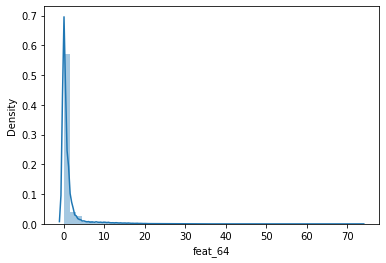

In [91]:
#去除'feat1'中的缺失值，distplot不能处理缺失数据

## 我们现初步观察一下分布
### 几乎每个feature的分布都是下面这幅图的模样
feat1=dataset['feat_64'].dropna()

sns.distplot(feat1)


In [92]:
## 我们对数据都做log（x+1）处理，希望他们能正太一点
### 定义apply函数
def convert2(x):
    return math.log(x+1)

for i in range(93):
    s = 'feat_{n}'
    dataset[s.format(n = i+1)] = dataset[s.format(n=i+1)].apply(convert2)


<AxesSubplot:xlabel='feat_64', ylabel='Density'>

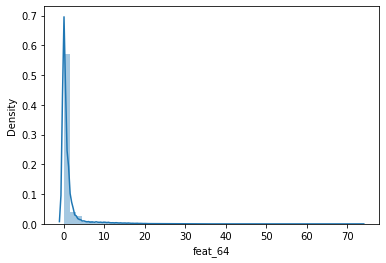

In [93]:
# 其实也满正太的了
dfeat1=dataset['feat_1'].dropna()

sns.distplot(feat1)

In [94]:
X = dataset.values[:,1:94]   # X就是data
X.shape

(61878, 93)

In [95]:
Y = dataset.values[:,[94]]    # Y就是label,注意规模
Y 

array([[0.],
       [0.],
       [0.],
       ...,
       [8.],
       [8.],
       [8.]])

In [99]:
# 划分训练集和验证集（开发集）
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25)     #8:2比较好
Ytrain

array([[7.],
       [5.],
       [2.],
       ...,
       [6.],
       [5.],
       [2.]])

In [100]:
# 初始化
class OttoDataset(Dataset):
    def __init__(self, data,label):
 
        self.len = data.shape[0] # shape(多少行，多少列)
        self.x_data = torch.from_numpy(data)
        self.x_data = self.x_data.to(torch.float32)
        self.y_data = torch.from_numpy(label)
        self.y_data = self.y_data.to(torch.float32)

 
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
 
    def __len__(self):
        return self.len
 
 
train_dataset = OttoDataset(Xtrain,Ytrain)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0) 
test_dataset = OttoDataset(Xtest,Ytest)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=0)



In [124]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(93, 64)
        self.l2 = torch.nn.Linear(64, 32)
        self.l3 = torch.nn.Linear(32, 16)
        self.l4 = torch.nn.Linear(16, 9)
 
    def forward(self, x):
        x = x.view(-1, 93)  # -1其实就是自动获取mini_batch
        x = torch.relu(self.l1(x))
        x = torch.relu(self.l2(x))
        x = torch.relu(self.l3(x))
        return self.l4(x)  # 最后一层不做激活，不进行非线性变换,因为我们用的交叉墒损失函数
 
 
model = Net()
 
# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
 
# training cycle forward, backward, update
 
 
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        # 获得一个批次的数据和标签
        inputs, target = data
        target = torch.tensor(target, dtype=torch.long) 
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target.squeeze())
        loss.backward()
        optimizer.step()
 
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
    
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, dim=1) # dim = 1 列是第0个维度，行是第1个维度
            ## 上面一句代码很有解释的必要：
            ### 我们注意网络设置最后输出10个feature，下标表示就是0到9，样本数应当是一个batchsize
            ### 所以，我们输出概率值最大的那个feature对应的下标就是他所属的类别（下标0到9对应类别0到9）
            ### 根据下面的demo code，就是predicted
            total += labels.size(0)
            correct += (predicted == labels[:,0]).sum().item() # 张量之间的比较运算

    print('accuracy on test set: %d %% ' % (100*correct/total))     #由于是百分比所以乘100
 
 
if __name__ == '__main__':
    for epoch in range(50):
        train(epoch)
        test()

[1,   300] loss: 2.086
[1,   600] loss: 1.695
[1,   900] loss: 1.268
[1,  1200] loss: 1.092
accuracy on test set: 67 % 
[2,   300] loss: 0.901
[2,   600] loss: 0.821
[2,   900] loss: 0.786
[2,  1200] loss: 0.760
accuracy on test set: 73 % 
[3,   300] loss: 0.714
[3,   600] loss: 0.727
[3,   900] loss: 0.696
[3,  1200] loss: 0.703
accuracy on test set: 74 % 
[4,   300] loss: 0.673
[4,   600] loss: 0.668
[4,   900] loss: 0.679
[4,  1200] loss: 0.669
accuracy on test set: 75 % 
[5,   300] loss: 0.634
[5,   600] loss: 0.648
[5,   900] loss: 0.653
[5,  1200] loss: 0.635
accuracy on test set: 76 % 
[6,   300] loss: 0.642
[6,   600] loss: 0.637
[6,   900] loss: 0.605
[6,  1200] loss: 0.619
accuracy on test set: 76 % 
[7,   300] loss: 0.594
[7,   600] loss: 0.605
[7,   900] loss: 0.598
[7,  1200] loss: 0.605
accuracy on test set: 76 % 
[8,   300] loss: 0.592
[8,   600] loss: 0.588
[8,   900] loss: 0.596
[8,  1200] loss: 0.590
accuracy on test set: 77 % 
[9,   300] loss: 0.567
[9,   600] loss: 

In [125]:
# 基本上在开发集上的准确率达到了79%
## 我们把开发集也融入训练集一起训练，最后放到测试集里面看看结果如何
